# Problem Statement
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

## Importing train and test datasets

In [2]:
train = pd.read_csv('C://Users//Aditya Prakash//Downloads//DSE//mysavedfiles//Bigsalesmart//train.csv')

In [3]:
test = pd.read_csv('C://Users//Aditya Prakash//Downloads//DSE//mysavedfiles//Bigsalesmart//test.csv')

In [4]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
train.shape

(8523, 12)

In [7]:
test.shape

(5681, 11)

## Filling null values and cleaning the data

In [8]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
train.Item_Weight.describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [10]:
train.Item_Weight.fillna(value = 12.6, inplace = True)

In [11]:
train.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [12]:
train.Outlet_Size.fillna(value = 'Medium', inplace = True)

In [13]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [14]:
test.Item_Weight.describe()

count    4705.000000
mean       12.695633
std         4.664849
min         4.555000
25%         8.645000
50%        12.500000
75%        16.700000
max        21.350000
Name: Item_Weight, dtype: float64

In [15]:
test.Item_Weight.fillna(value = 12.5, inplace = True)

In [16]:
test.Outlet_Size.value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [17]:
test.Outlet_Size.fillna(value = 'Medium', inplace = True)

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [19]:
train.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [20]:
train.Item_Fat_Content.replace(to_replace = 'low fat', value = 'Low Fat', inplace = True)

In [21]:
train.Item_Fat_Content.replace(to_replace = 'LF', value = 'Low Fat', inplace = True)

In [22]:
train.Item_Fat_Content.replace(to_replace = 'reg', value = 'Regular', inplace = True)

In [23]:
test.Item_Fat_Content.unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [24]:
test.Item_Fat_Content.replace(to_replace = 'reg', value = 'Regular', inplace = True)

In [25]:
test.Item_Fat_Content.replace(to_replace = 'LF', value = 'Low Fat', inplace = True)

In [26]:
test.Item_Fat_Content.replace(to_replace = 'low fat', value = 'Low Fat', inplace = True)

In [27]:
train['Per_unit_price'] = train.Item_Weight/train.Item_MRP

In [28]:
test['Per_unit_price'] = test.Item_Weight/test.Item_MRP

In [29]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Per_unit_price
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0.037228
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,0.122645
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,0.123572
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,0.105439
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0.165796


In [30]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Per_unit_price
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,0.192375
1,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1,0.095053
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,0.060392
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1,0.047183
4,FDY38,12.500,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,0.053366


## EDA

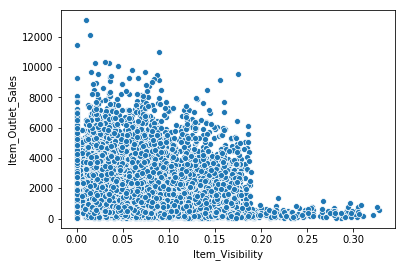

In [31]:
sn.scatterplot(train.Item_Visibility, train.Item_Outlet_Sales)

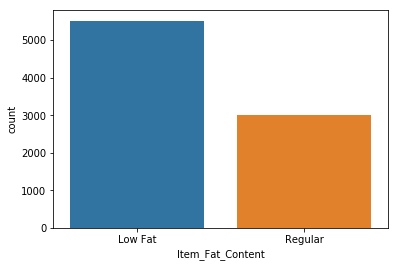

In [32]:
sn.countplot(train.Item_Fat_Content)

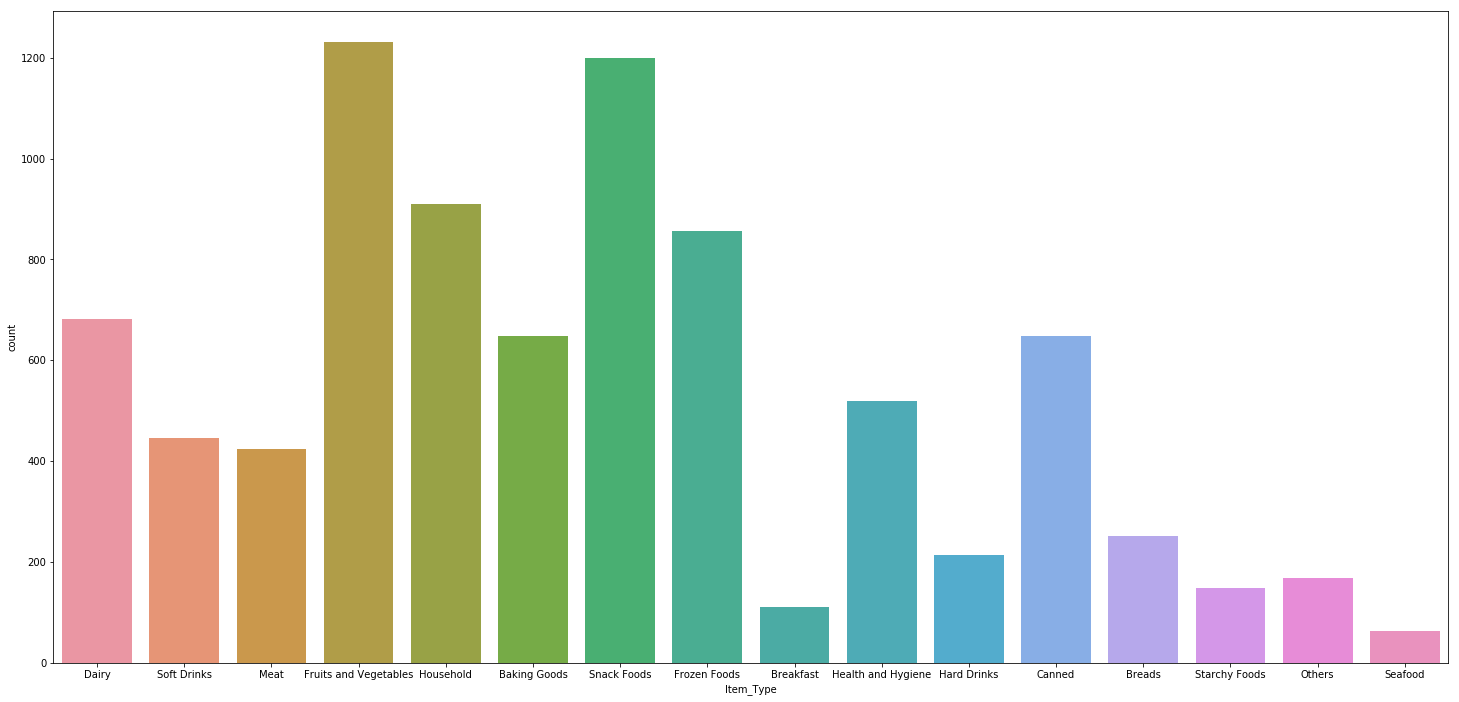

In [33]:
plt.figure(figsize=[25,12])
sn.countplot(train.Item_Type)

In [34]:
test.shape

(5681, 12)

In [35]:
Item_idtrain=[]
for i in range(0,8523):
    Item_idtrain.append(train.Item_Identifier[i][0:2])

In [36]:
Item_idtest=[]
for i in range(0,5681):
    Item_idtest.append(test.Item_Identifier[i][0:2])

In [37]:
train['Item_id'] = pd.DataFrame(Item_idtrain)

In [38]:
test['Item_id'] = pd.DataFrame(Item_idtest)

In [39]:
train.drop('Item_id', axis = 1, inplace =True)

In [40]:
test.drop('Item_id', axis = 1, inplace =True)

In [41]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Per_unit_price
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0.037228
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,0.122645
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,0.123572
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,0.105439
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0.165796


In [42]:
train.drop('Item_Identifier', axis = 1, inplace = True)
test.drop('Item_Identifier', axis = 1, inplace = True)

In [43]:
train.shape

(8523, 12)

In [44]:
test.shape

(5681, 11)

In [45]:
train.Outlet_Identifier.value_counts()

OUT027    935
OUT013    932
OUT046    930
OUT049    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

C:\Users\Aditya Prakash\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


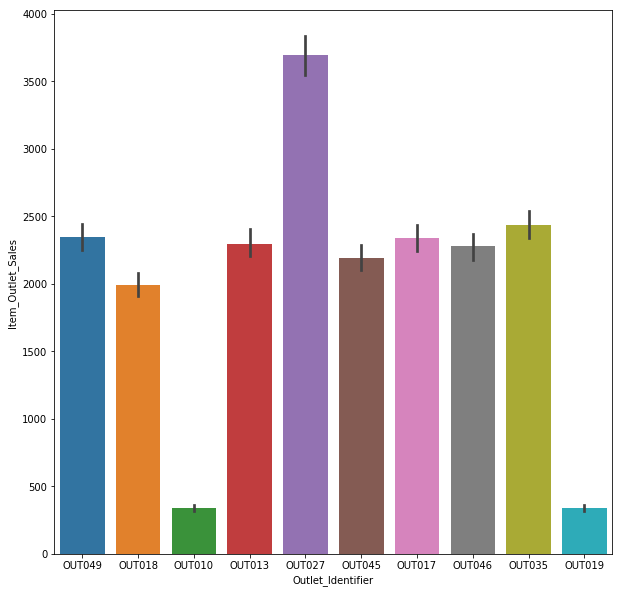

In [46]:
plt.figure(figsize=[10,10])
sn.barplot(train.Outlet_Identifier,train.Item_Outlet_Sales)


In [47]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Per_unit_price
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0.037228
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,0.122645
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,0.123572
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,0.105439
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0.165796


In [48]:
Outlet_Established_yeartest = []
for i in range(0,5681):
    Outlet_Established_yeartest.append(2019-(test.Outlet_Establishment_Year[i]))

In [49]:
test.shape

(5681, 11)

In [50]:
test['Outlet_Established_year'] = pd.DataFrame(Outlet_Established_yeartest)

In [51]:
Outlet_Established_yeartrain = []
for i in range(0,8523):
    Outlet_Established_yeartrain.append(2019-(train.Outlet_Establishment_Year[i]))

In [52]:
train['Outlet_Established_year'] = pd.DataFrame(Outlet_Established_yeartrain)

In [53]:
train.shape

(8523, 13)

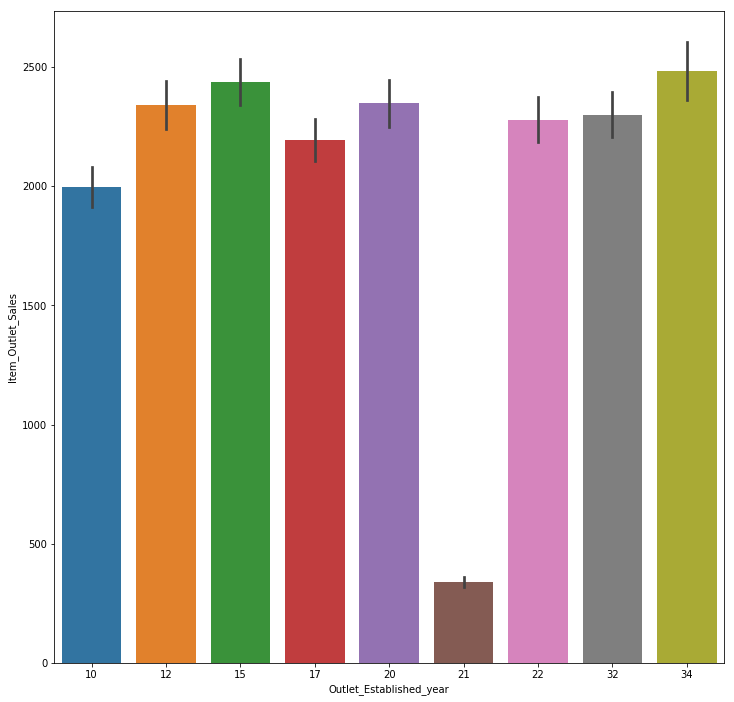

In [54]:
plt.figure(figsize=[12,12])
sn.barplot(train.Outlet_Established_year, train.Item_Outlet_Sales)

In [55]:
train.Outlet_Location_Type.unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

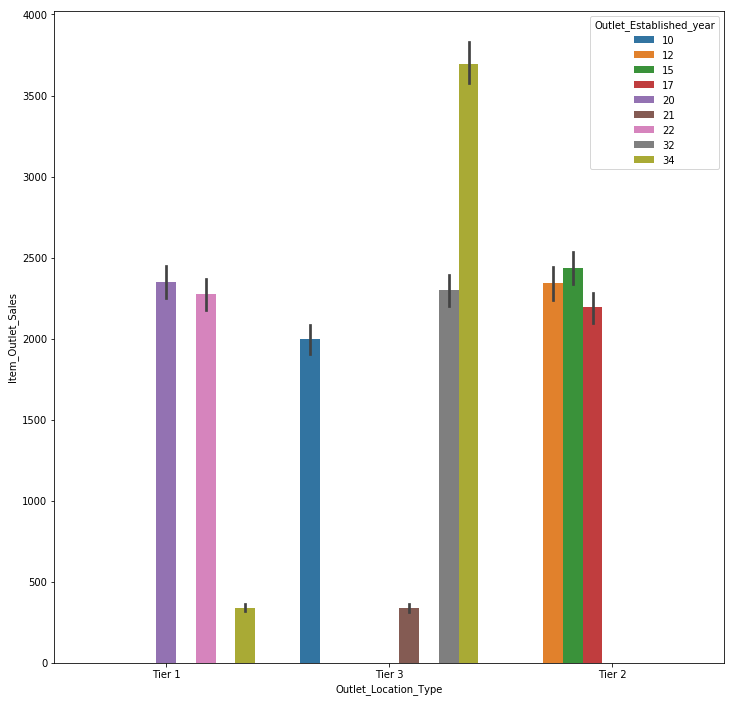

In [56]:
plt.figure(figsize=[12,12])
sn.barplot(train.Outlet_Location_Type,train.Item_Outlet_Sales ,hue=train.Outlet_Established_year)

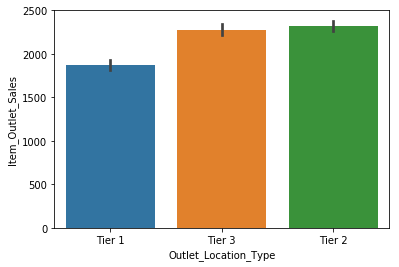

In [57]:
sn.barplot( train.Outlet_Location_Type,train.Item_Outlet_Sales)

In [58]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Per_unit_price,Outlet_Established_year
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0.037228,20
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,0.122645,10
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,0.123572,20
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,0.105439,21
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0.165796,32


In [59]:
train.drop('Outlet_Establishment_Year', axis =1, inplace =True)

In [60]:
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Per_unit_price,Outlet_Established_year
0,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,0.192375,20
1,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1,0.095053,12
2,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,0.060392,21
3,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1,0.047183,12
4,12.500,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,0.053366,34


In [61]:
test.drop('Outlet_Establishment_Year', axis =1, inplace =True)

In [62]:
test.drop('Item_MRP', axis =1, inplace =True)

In [63]:
train.drop('Item_MRP', axis =1, inplace =True)

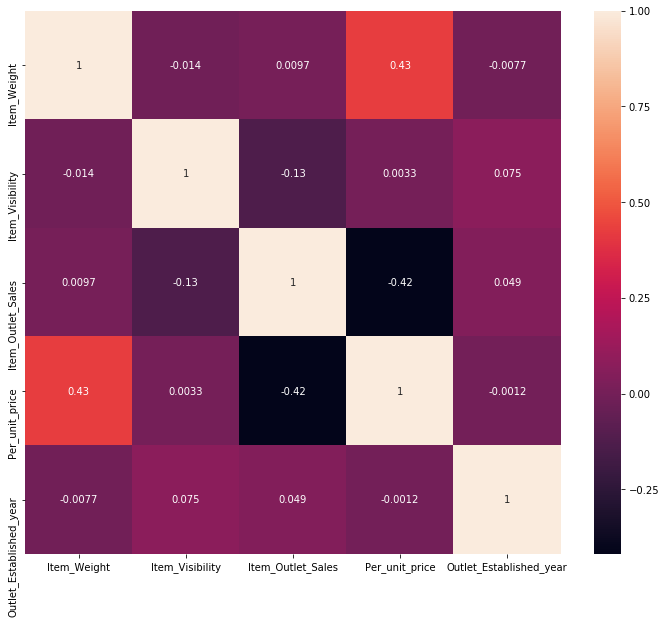

In [64]:
plt.figure(figsize=[12,10])
sn.heatmap(train.corr(), annot = True)

In [65]:
train.isnull().sum()

Item_Weight                0
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size                0
Outlet_Location_Type       0
Outlet_Type                0
Item_Outlet_Sales          0
Per_unit_price             0
Outlet_Established_year    0
dtype: int64

In [66]:
test.isnull().sum()

Item_Weight                0
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size                0
Outlet_Location_Type       0
Outlet_Type                0
Per_unit_price             0
Outlet_Established_year    0
dtype: int64

In [67]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Per_unit_price,Outlet_Established_year
0,9.30,Low Fat,0.016047,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,0.037228,20
1,5.92,Regular,0.019278,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,0.122645,10
2,17.50,Low Fat,0.016760,Meat,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,0.123572,20
3,19.20,Regular,0.000000,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store,732.3800,0.105439,21
4,8.93,Low Fat,0.000000,Household,OUT013,High,Tier 3,Supermarket Type1,994.7052,0.165796,32


In [68]:
newtrain = pd.get_dummies(train)

In [69]:
newtrain.shape

(8523, 43)

In [70]:
newtest = pd.get_dummies(test)

In [71]:
newtest.shape

(5681, 42)

## Importing ML algorithms

In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [101]:
lr = LinearRegression()
sc = StandardScaler()
knn = KNeighborsRegressor()
tree = DecisionTreeRegressor(max_depth=5)
rf = RandomForestRegressor(max_depth=5)

In [75]:
x = newtrain.drop('Item_Outlet_Sales', axis=1)
y = newtrain.Item_Outlet_Sales

In [76]:
scaledtrain = pd.DataFrame(sc.fit_transform(x), columns=x.columns)
scaledtest = pd.DataFrame(sc.fit_transform(newtest), columns=newtest.columns)

C:\Users\Aditya Prakash\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Aditya Prakash\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Aditya Prakash\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Aditya Prakash\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [77]:
predtrain = lr.fit(x,y).predict(scaledtest)

In [78]:
x.shape

(8523, 42)

In [79]:
y.shape

(8523,)

In [80]:
predtraindf = pd.DataFrame(predtrain)

In [83]:
predtraindf.to_csv('bigsales.csv')

In [87]:
cd

C:\Users\Aditya Prakash


In [84]:
dtreetrain = tree.fit(x,y).predict(scaledtest)

In [85]:
dtreetraindf = pd.DataFrame(dtreetrain) 

In [88]:
dtreetraindf.to_csv('bigsalesdtree.csv')

In [ ]:
tree

In [89]:
knntrain = knn.fit(x,y).predict(scaledtest)

In [90]:
knndf = pd.DataFrame(knntrain)

In [93]:
knndf.to_csv('knnbigdata.csv')

In [92]:
cd

C:\Users\Aditya Prakash


In [102]:
rfmodel = pd.DataFrame(rf.fit(x,y).predict(scaledtest))

C:\Users\Aditya Prakash\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [105]:
rfmodel.to_csv('bigsalesrf.csv')

In [104]:
cd

C:\Users\Aditya Prakash
